# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ForeignGifts_edu.csv to ForeignGifts_edu.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Pandas automatically uses some pyplot functions, so we need it loaded
import seaborn as sns # Import Seaborn

df = pd.read_csv('ForeignGifts_edu.csv') # Local file

df.head()
df.value_counts()

,,,,,,,,,,count
ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name,
28221,4279700,Albert Einstein College of Medicine,Bronx,NY,43692,1024469,Monetary Gift,ISRAEL,Estate of Alfred Gertrud Sommerguth,1
2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters,1
3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce,1
4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission,1
5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission,1
...,...,...,...,...,...,...,...,...,...,...
12,105100,University of Alabama,Tuscaloosa,AL,43543,5188,Contract,SAUDI ARABIA,Saudi Arabia Education Mission,1
11,105100,University of Alabama,Tuscaloosa,AL,43542,57778,Contract,SAUDI ARABIA,Saudi Arabia Education Mission,1
10,105100,University of Alabama,Tuscaloosa,AL,43531,57049,Contract,JAPAN,Kansai Gaidai University (KGU),1


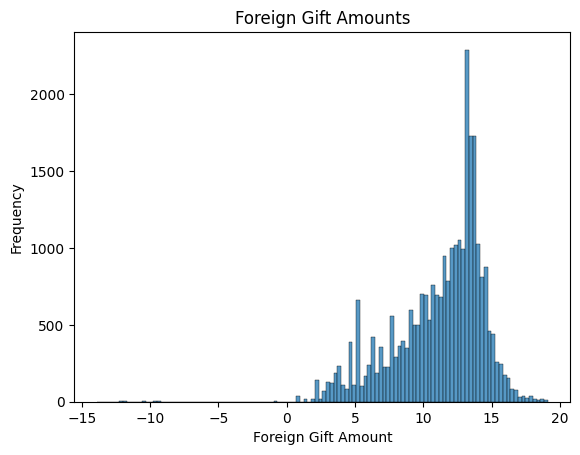

In [5]:
# Histogram:
import seaborn as sns
var = np.arcsinh(df['Foreign Gift Amount'])

fig = sns.histplot(data=df, x=var) # Same thing
fig.set(title='Foreign Gift Amounts',
xlabel='Foreign Gift Amount',
ylabel='Frequency')
plt.show()


***This histogram table shows....***

In [12]:
df['Gift Type'].value_counts()

,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


This value counts table shows that 61.2% of gifts are contracts, 38.7% of gifts are monetary gifts, and 0.03% of gifts are real estate.

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


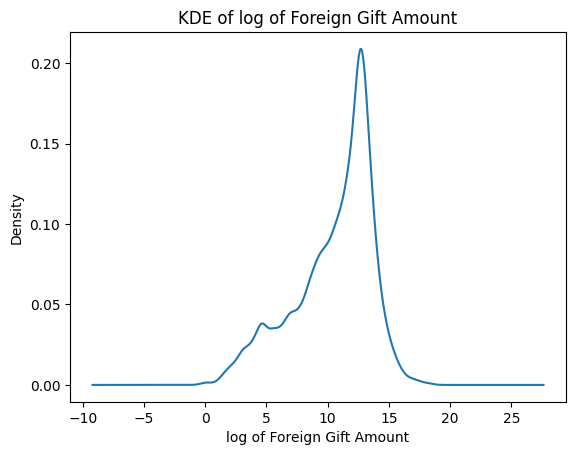

In [9]:
log_fgamount = np.log(df['Foreign Gift Amount'].dropna())
log_fgamount = log_fgamount[np.isfinite(log_fgamount)]

plt.figure()
log_fgamount.plot(kind='kde')
plt.xlabel('log of Foreign Gift Amount')
plt.title('KDE of log of Foreign Gift Amount')
plt.show()

Because the log of the graph was taken, the distribution is a lot more symmetric and normally distributed, and because of that it's a lot easier to analyze and compare the groups versus the raw histogram which is likely skewed because of extreme values. Additionally the KDE plot smooths everything over so its easier to look at.

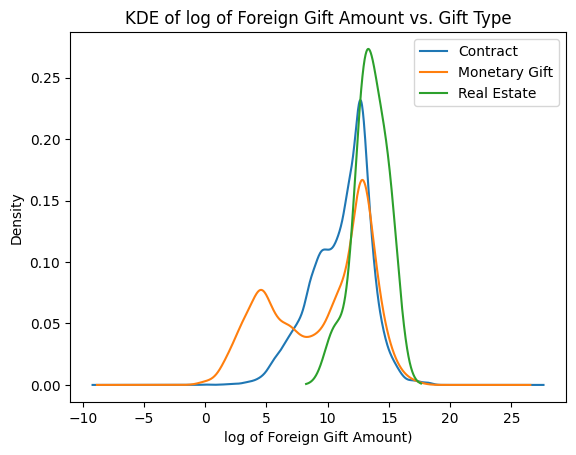

In [11]:
plt.figure()

for gtype, subset in df.groupby('Gift Type'):
    vals = subset['Foreign Gift Amount']
    vals = vals[vals > 0].dropna()
    if len(vals) > 1:
        np.log(vals).plot(kind='kde', label=gtype)

plt.xlabel('log of Foreign Gift Amount)')
plt.title('KDE of log of Foreign Gift Amount vs. Gift Type')
plt.legend()
plt.show()

In [13]:
df['Country of Giftor'].value_counts().head(15)

,count
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


The top 15 countries are listed above!

In [15]:
by_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False)
by_amount.head(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


The top 15 countries by amounts are listed above!

In [16]:
topinstitutions = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)
topinstitutions.head(15)


,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


Top 15 institutions are above!

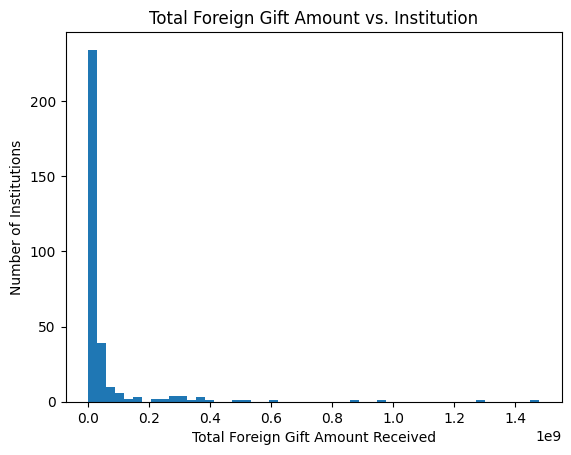

In [19]:
institution_totals = df.groupby('Institution Name')['Foreign Gift Amount'].sum()

plt.figure()
plt.hist(institution_totals, bins=50)
plt.xlabel('Total Foreign Gift Amount Received')
plt.ylabel('Number of Institutions')
plt.title('Total Foreign Gift Amount vs. Institution')
plt.show()

In [20]:
top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)
top_giftors.head(15)


,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


The top giftors are listed above!

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [23]:
from google.colab import files
uploaded = files.upload()

Saving airbnb_hw (1).csv to airbnb_hw (1).csv


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('airbnb_hw (1).csv')

df.shape
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [28]:
df.shape

(30478, 13)

There are 30478 rows and 13 columns in the df dataset. Each observation represents an Airbnb listing in New York City. The variables include information on price, room type, kind of property, number of beds, and other listing characteristics.

In [26]:
pd.crosstab(df['Room Type'], df['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


Entire homes/apartments are most common property types, particularly apartments and houses. Private rooms are especially common in apartments and houses. On the other hand, entire property rentals are more common for property types like condos and townhouses.

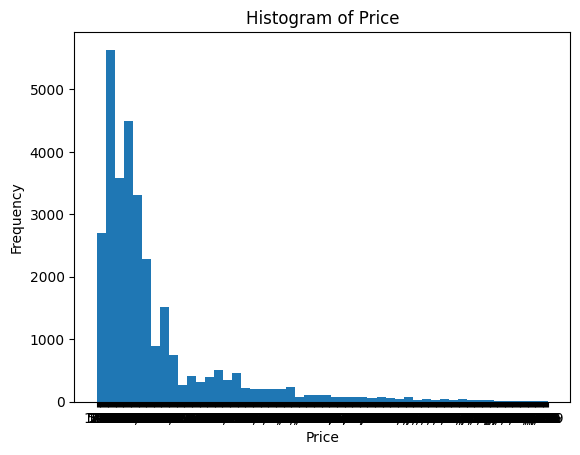

In [30]:
df['Price'].describe()
plt.figure()
plt.hist(df['Price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()


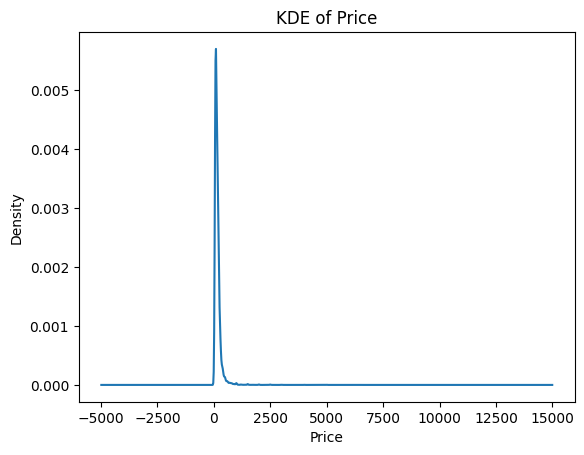

In [33]:
#tried to run but 'Price' is numeric and needs to be cleaned

df['Price'] = (df['Price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float))

plt.figure()
df['Price'].plot(kind='kde')
plt.xlabel('Price')
plt.title('KDE of Price')
plt.show()


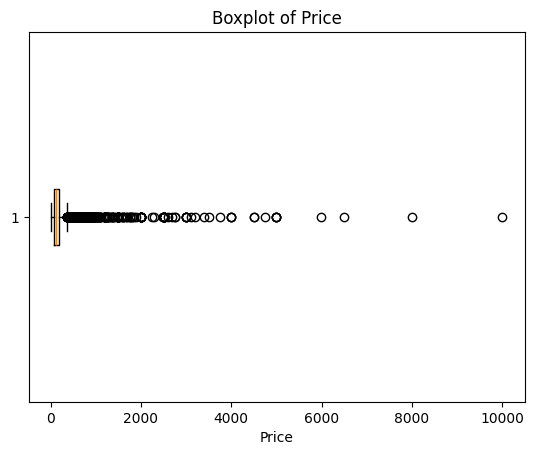

In [34]:
plt.figure()
plt.boxplot(df['Price'], vert=False)
plt.xlabel('Price')
plt.title('Boxplot of Price')
plt.show()

In [35]:
#The data are badly scaled, so using log will smooth them

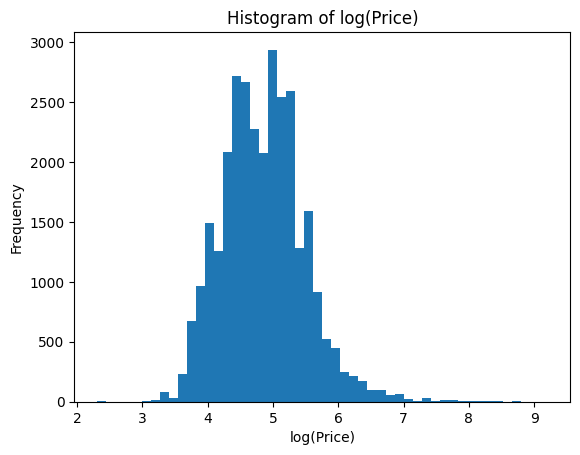

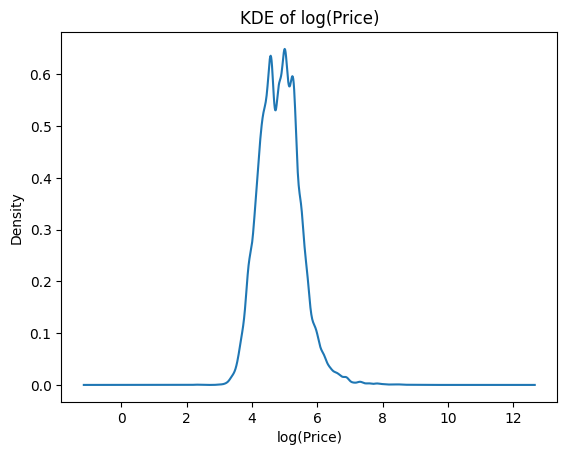

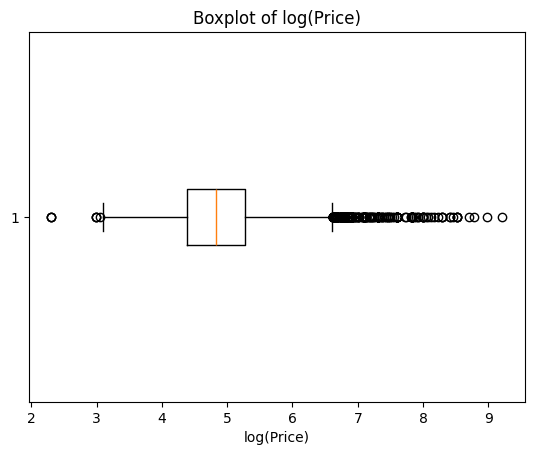

In [36]:
df['price_log'] = np.log(df['Price'])

plt.figure()
plt.hist(df['price_log'], bins=50)
plt.xlabel('log(Price)')
plt.ylabel('Frequency')
plt.title('Histogram of log(Price)')
plt.show()

plt.figure()
df['price_log'].plot(kind='kde')
plt.xlabel('log(Price)')
plt.title('KDE of log(Price)')
plt.show()

plt.figure()
plt.boxplot(df['price_log'], vert=False)
plt.xlabel('log(Price)')
plt.title('Boxplot of log(Price)')
plt.show()

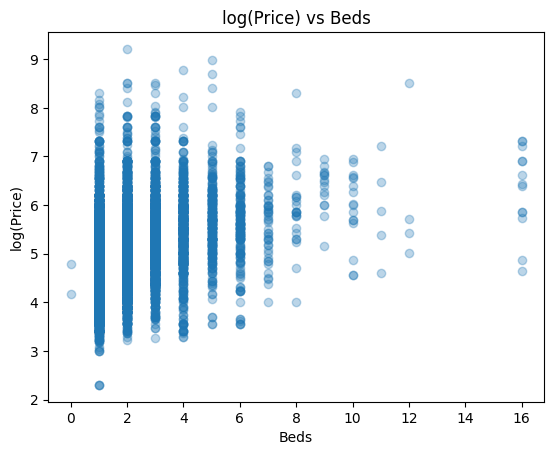

In [37]:
plt.figure()
plt.scatter(df['Beds'], df['price_log'], alpha=0.3)
plt.xlabel('Beds')
plt.ylabel('log(Price)')
plt.title('log(Price) vs Beds')
plt.show()


There is a positive relationship between the number of beds and logof the price. This shows listings with more beds tend to be more expensive.

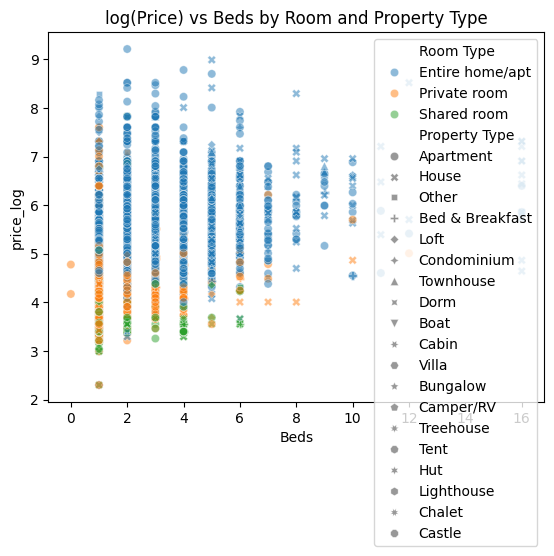

count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
                Other               14.0  843.428571  1133.062271   66.0   
                Townhouse           83.0  280.783133   314.605252   66.0   
                Villa                4.0  529.750000   650.963581  120.0   
Private room    Apartment        10748.0   92.713900    65.237050   10.0   
                Bed & Breakfast    155.0   97.161290    47.031971   32.0   
                Boat                 1.0  120.000000          NaN  120.0   
                Cabin                1.0   80.000000          NaN   80.0   
                Camper/RV            1.0   39.000000          NaN   39.0   
                Castle               1.0  150.000000          NaN  150.0   
                Chalet               1.0   99.000000          NaN   99.0   
                Condominium         22.0   98.590909    40.576394   46.0   
                Dorm                16.0   86.562500    40.738137   50.0   
                House             1258.0   77.750397    49.402650   25.0   
                Hut                  2.0   75.000000    35.355339   50.0   
                Loft               312.0  108.057692   128.817912   39.0   
                Other               29.0  211.931034   235.404505   39.0   
                Tent                 4.0  126.250000    94.989034   40.0   
                Townhouse           52.0   83.365385    30.578109   45.0   
                Treehouse            1.0   95.000000          NaN   95.0   
                Villa                4.0  126.250000    71.107313   60.0   
Shared room     Apartment          685.0   79.200000    67.720849   20.0   
                Bed & Breakfast     12.0  143.666667   245.328104   30.0   
                Dorm                11.0   73.181818    46.328864   30.0   
                House               80.0   77.487500   275.409936   10.0   
                Loft                49.0   78.816327    87.521824   30.0   
                Other                4.0  148.750000   134.806961   70.0   
                Townhouse            1.0   95.000000          NaN   95.0   
                Treehouse            3.0  167.666667   114.788211   95.0   

                                    25%    50%      75%      max  
Room Type       Property Type                                     
Entire home/apt Apartment        135.00  175.0   235.00  10000.0  
                Bed & Breakfast  121.00  130.0   220.00    525.0  
                Boat             122.50  150.0   182.00    250.0  
                Bungalow         133.50  160.5   177.75    195.0  
                Cabin            250.00  250.0   250.00    250.0  
                Camper/RV         49.00   74.0   114.00    325.0  
                Condominium      155.00  200.0   375.00   1990.0  
                Dorm              30.00   33.5    47.75     80.0  
                House            126.50  195.0   300.00   8000.0  
                Lighthouse        39.00   39.0    39.00     39.0  
                Loft             160.00  225.0   379.00   3000.0  
                Other            140.00  300.0 

In [38]:
plt.figure()
sns.scatterplot(
    data=df,
    x='Beds',
    y='price_log',
    hue='Room Type',
    style='Property Type',
    alpha=0.5
)
plt.title('log(Price) vs Beds by Room and Property Type')
plt.show()
df.groupby(['Room Type', 'Property Type'])['Price'].describe()


Entire homes always had more expensive prices than single rooms. There is a lot of skewed-ness from the data as seen earlier, which is why median is a better measure of average than the true average mean
Entire homes always had more expensive prices than single rooms. There is a lot of skewed-ness from the data as seen earlier, which is why median is a better measure of average than the true average mean


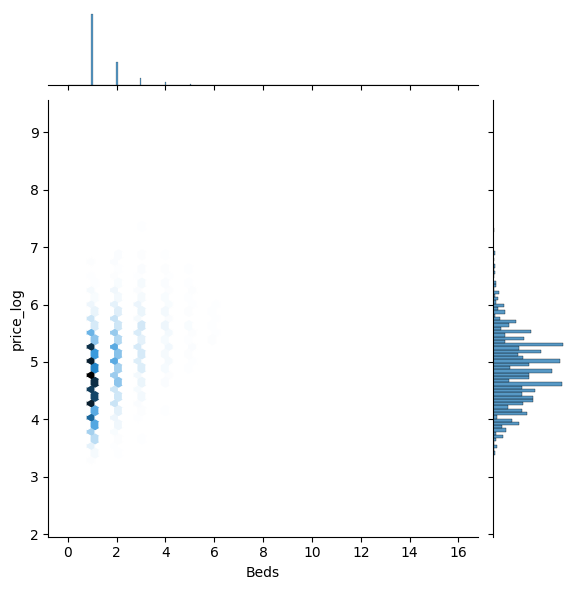

In [41]:
sns.jointplot(data=df, x='Beds', y='price_log', kind='hex')
plt.show()

The majority of observations are concentrated at low numbers of beds (1–2) and moderate log prices. Most airbnb activity is for smaller room/bed numbefrs.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [42]:
from google.colab import files
uploaded = files.upload()

Saving drilling_rigs.csv to drilling_rigs.csv


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('drilling_rigs.csv')

print(df.shape)
df.head()


(623, 10)


,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [45]:
df.dtypes

,0
Month,object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)",int64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)",int64
"Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",object
"Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",int64
Active Well Service Rig Count (Number of Rigs),object


The dataset contains 623 observations and 10 variables. The variables include counts of onshore rigs, offshore rigs, and the total number of active well service rigs. Some variables that represent numeric quantities may be read in as object types due to formatting issues. These variables must be coerced to numeric

In [48]:
for col in df.columns:
    if col != 'Month':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [47]:
df['time'] = pd.to_datetime(df['Month'], format='mixed')

Line plot: shows that the overall rigging has gone down over time, with short-term fluctuations that are likely due to policy shifts or somehting like that, but the general negative line plot is a good sign for environmental activism.

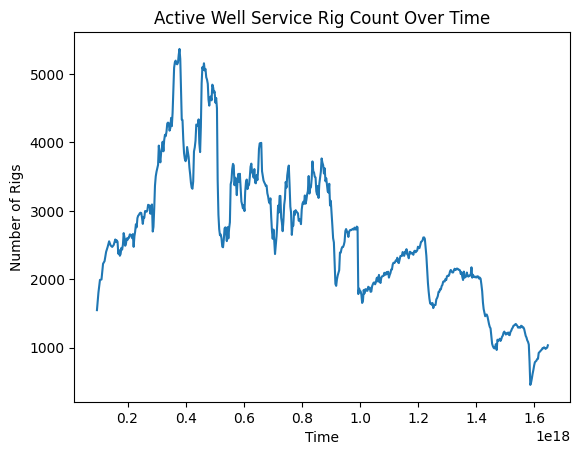

In [49]:
plt.figure()
plt.plot(df['time'], df['Active Well Service Rig Count (Number of Rigs)'])
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.title('Active Well Service Rig Count Over Time')
plt.show()

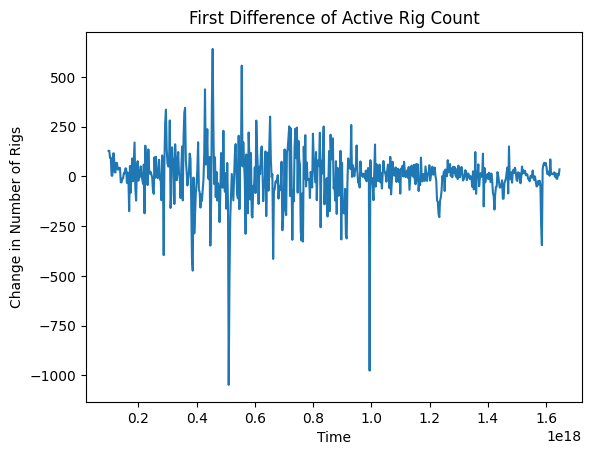

In [50]:
df['rig_diff'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()
plt.figure()
plt.plot(df['time'], df['rig_diff'])
plt.xlabel('Time')
plt.ylabel('Change in Number of Rigs')
plt.title('First Difference of Active Rig Count')
plt.show()


The graph shows sharp positive and negative spikes, indicating sudden increases or decreases in drilling activity. This is useful for looking at changes

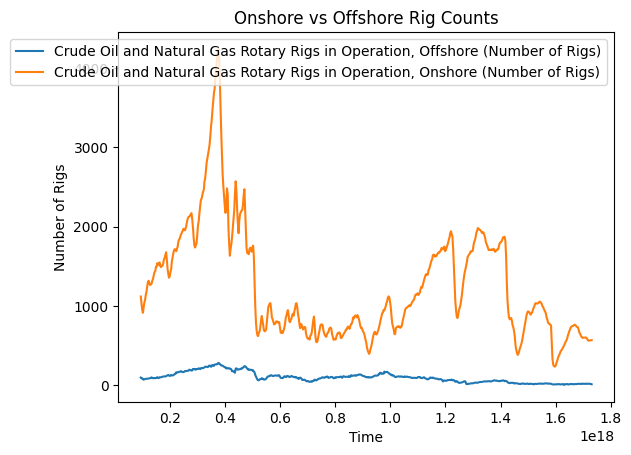

In [52]:
rigs_long = df.melt(id_vars=['time'],value_vars=[df.columns[1], df.columns[2]],var_name='Rig Type',value_name='Rig Count')
plt.figure()
for rig_type, subset in rigs_long.groupby('Rig Type'):
    plt.plot(subset['time'], subset['Rig Count'], label=rig_type)

plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.title('Onshore vs Offshore Rig Counts')
plt.legend()
plt.show()